<a href="https://colab.research.google.com/github/Asuna-sama-1/used_Car_prediction/blob/main/Used_Car_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics

### Load data

In [ ]:
data = pd.read_csv('Training_DataSet.csv')
data.head(3)

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,3287,Warren,False,Inventory Command Center,Prime Motorz,5.0,32,MI,48091.0,SUV,...,Jeep,39319.0,Grand Cherokee,Fair Price,NaN,Used,Automatic 8-Speed,2015,High Altitude,30990.0
1,3920,Fargo,False,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,SUV,...,Cadillac,30352.0,XT5,Good Deal,Come take a look at our great pre-owned invent...,Used,NaN,2017,NaN,34860.0
2,4777,Waukesha,False,Jeep Certified Program,Wilde Chrysler Jeep Dodge Ram &amp; Subaru,4.8,1405,WI,53186.0,SUV,...,Jeep,38957.0,Grand Cherokee,Good Deal,Backed by a rigorous 125-point inspection by f...,Used,8-Speed Automatic w/OD,2015,Laredo,23249.0


In [ ]:
data.duplicated().any()

False

In [ ]:
df = data.copy()
df= df.drop('ListingID',axis=1)

## Data Exploration Analysis

any patterns and relationships between variables? 

any missing values? 

any outliers?

#### Variable analysis 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6298 entries, 0 to 6297
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SellerCity            6298 non-null   object 
 1   SellerIsPriv          6298 non-null   bool   
 2   SellerListSrc         6296 non-null   object 
 3   SellerName            6298 non-null   object 
 4   SellerRating          6298 non-null   float64
 5   SellerRevCnt          6298 non-null   int64  
 6   SellerState           6298 non-null   object 
 7   SellerZip             6296 non-null   float64
 8   VehBodystyle          6298 non-null   object 
 9   VehCertified          6298 non-null   bool   
 10  VehColorExt           6225 non-null   object 
 11  VehColorInt           5570 non-null   object 
 12  VehDriveTrain         5897 non-null   object 
 13  VehEngine             5937 non-null   object 
 14  VehFeats              6023 non-null   object 
 15  VehFuel              

listing price is highly related to 
Engines,features, make, model,mileage seller name, color exi and color int



From the distribution of the price, we can see that the max and mean values are 85k and 32k, which are not that much of difference in terms of car price. Thus, we don't consider any outliers. 

### Missing Values

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
VehColorInt,728,0.115592
Vehicle_Trim,405,0.064306
VehDriveTrain,401,0.063671
VehEngine,361,0.057320
VehPriceLabel,285,0.045252
VehFeats,275,0.043665
VehSellerNotes,243,0.038584
VehHistory,201,0.031915
VehTransmission,197,0.031280
VehColorExt,73,0.011591


In [ ]:
df= df[df['VehHistory'].notna()]
df= df[df['VehFeats'].notna()]
df= df[df['VehSellerNotes'].notna()]
df= df[df['Dealer_Listing_Price'].notna()]
df= df[df['Vehicle_Trim'].notna()]

In [ ]:
data['VehColorInt'].loc[data['VehColorInt'] == 'Other']

657     Other
1973    Other
2055    Other
3512    Other
5483    Other
Name: VehColorInt, dtype: object

In [ ]:
df['VehFuel'] = df.VehFuel.fillna('Unknown')
df['VehColorExt'] = df.VehColorExt.fillna('Other')
df['VehColorInt'] = df.VehColorInt.fillna('Other')
df['VehTransmission'] = df.VehTransmission.fillna('Not Specified')

df['SellerZip'] = df['SellerZip'].fillna(method='ffill')
df['SellerListSrc'] = df['SellerListSrc'].fillna(method='ffill')
df['VehDriveTrain'] = df['VehDriveTrain'].fillna(method='ffill')
df['VehEngine'] = df['VehEngine'].fillna(method='ffill')
df['VehPriceLabel'] = df['VehPriceLabel'].fillna(method='ffill')

df['VehMileage'] = df.VehMileage.fillna(df.VehMileage.mean())
df['Dealer_Listing_Price'] = df.Dealer_Listing_Price.fillna(df.Dealer_Listing_Price.mean())
df['VehListdays'] = df.VehListdays.fillna(df.VehListdays.mean())


## Feature Eng

### Continous

In [ ]:
df.describe()

,SellerRating,SellerRevCnt,SellerZip,VehListdays,VehMileage,VehYear,Dealer_Listing_Price
count,5567.000000,5567.000000,5567.000000,5567.000000,5567.000000,5567.000000,5567.000000
mean,4.181696,460.549129,45231.601581,56.729619,26483.568529,2016.778516,32092.161308
std,1.109681,1341.472972,20014.312425,67.117143,13014.968434,1.209163,7584.119965
min,0.000000,0.000000,1105.000000,1.676551,0.000000,2015.000000,18289.000000
25%,4.000000,31.000000,29627.500000,13.987546,17079.000000,2015.000000,26795.500000
50%,4.600000,141.000000,46545.000000,34.482361,26181.000000,2017.000000,31000.000000
75%,4.800000,422.500000,60120.000000,75.210880,36655.000000,2018.000000,35850.000000
max,5.000000,14635.000000,99654.000000,820.684375,83037.000000,2019.000000,89500.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efccba50550>,
      dtype=object)

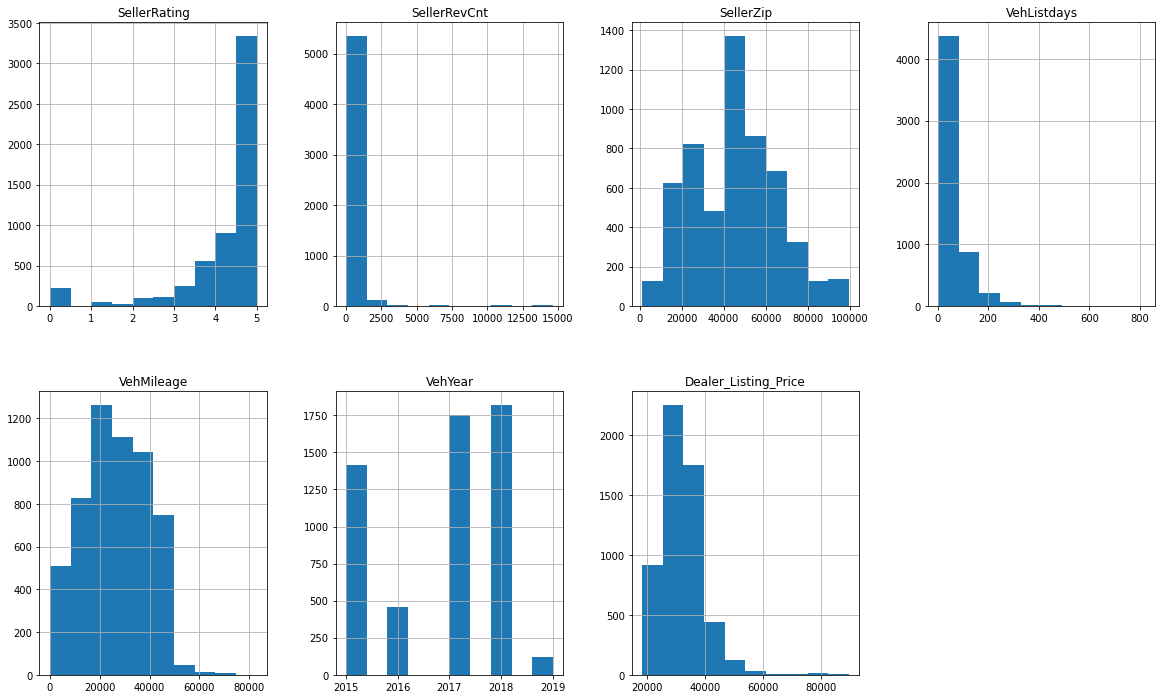

In [ ]:
df.hist(figsize=(20,12),layout=(2,4))

Outliers

SellerRevCnt above 4k is 77


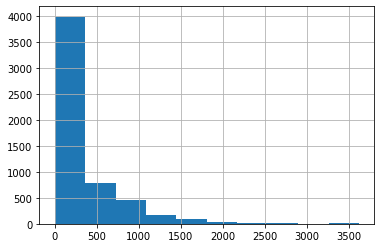

In [ ]:
print('SellerRevCnt above 4k is', len(df[df['SellerRevCnt']>=4000]))
df['SellerRevCnt'] = np.where(df['SellerRevCnt'] >= 4000, df['SellerRevCnt'].mean(), df['SellerRevCnt'])
df.SellerRevCnt.hist()

Linear relationship with price

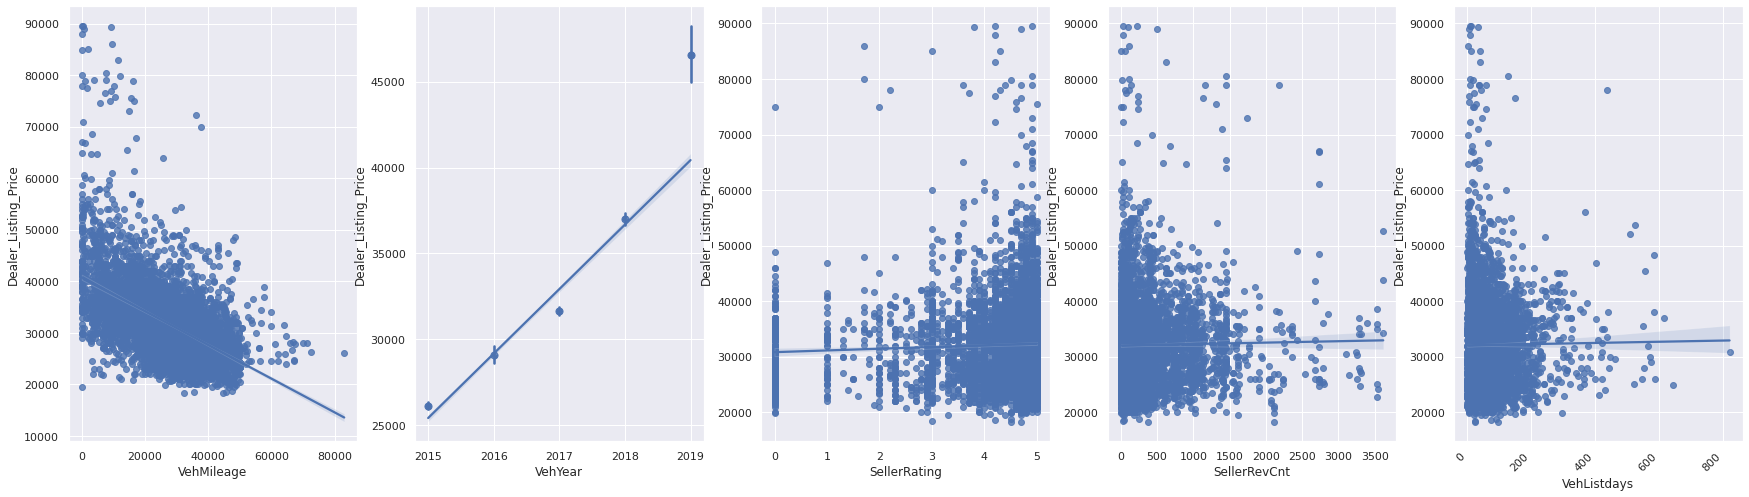

In [ ]:
sns.set(rc = {'figure.figsize':(30,8)})
fig, ax =plt.subplots(1,5)

sns.regplot(x="VehMileage", y="Dealer_Listing_Price", data=df, ax=ax[0])
sns.regplot(x="VehYear", y="Dealer_Listing_Price", data=df,x_estimator=np.mean, ax=ax[1])
sns.regplot(x="SellerRating", y="Dealer_Listing_Price", data=df, ax=ax[2])
sns.regplot(x="SellerRevCnt", y="Dealer_Listing_Price", data=df, ax=ax[3])
sns.regplot(x="VehListdays", y="Dealer_Listing_Price", data=df, ax=ax[4])

plt.xticks(rotation=45, horizontalalignment='right')
fig.show()

### Categorical

Vehicle_Trim

In [ ]:
df["Vehicle_Trim"] = df["Vehicle_Trim"].str.lower()
df.Vehicle_Trim.value_counts()

limited             1838
premium              761
laredo               721
luxury               667
overland             373
altitude             354
summit               222
base                 200
trailhawk            164
platinum             137
srt                   72
trackhawk             29
sterling edition      26
upland                 3
Name: Vehicle_Trim, dtype: int64

In [ ]:
df["Vehicle_Trim"]=df["Vehicle_Trim"].mask(df["Vehicle_Trim"].str.contains('limited', regex=False),'limited')
df["Vehicle_Trim"]=df["Vehicle_Trim"].mask(df["Vehicle_Trim"].str.contains('anniversary', regex=False),'limited')
df["Vehicle_Trim"]=df["Vehicle_Trim"].mask(df["Vehicle_Trim"].str.contains('premium', regex=False),'premium')
df["Vehicle_Trim"]=df["Vehicle_Trim"].mask(df["Vehicle_Trim"].str.contains('altitude', regex=False),'altitude')
df["Vehicle_Trim"]=df["Vehicle_Trim"].mask(df["Vehicle_Trim"].str.contains('srt', regex=False),'srt')
df["Vehicle_Trim"]=df["Vehicle_Trim"].mask(df["Vehicle_Trim"].str.contains('luxury', regex=False),'luxury')
df["Vehicle_Trim"]=df["Vehicle_Trim"].mask(df["Vehicle_Trim"].str.contains('laredo', regex=False),'laredo')
df["Vehicle_Trim"]=df["Vehicle_Trim"].mask(df["Vehicle_Trim"].str.contains('platinum', regex=False),'platinum')
df["Vehicle_Trim"]=df["Vehicle_Trim"].mask(df["Vehicle_Trim"].str.contains('fwd', regex=False),'base')

#### SellerIsPriv

when seller is private, there is either veh history nor veh feature data ava


In [ ]:
data.SellerIsPriv.value_counts()

False    6284
True       14
Name: SellerIsPriv, dtype: int64

In [ ]:
data[['SellerCity','SellerName','SellerIsPriv','VehHistory','VehFeats']].loc[data['SellerIsPriv'] == True]

,SellerCity,SellerName,SellerIsPriv,VehHistory,VehFeats
312,Chicago,Kenneth,True,NaN,NaN
993,Rochester,SCOTT,True,NaN,NaN
1001,Battle Creek,Craig,True,NaN,NaN
1402,Painesville,Matt,True,NaN,NaN
1798,Mercersburg,Amanda,True,NaN,NaN
2000,Lake Stevens,Dan,True,NaN,NaN
2197,Oklahoma City,Tim,True,NaN,NaN
2203,Baltimore,Jeremy,True,NaN,NaN
3145,York,Shaun,True,NaN,NaN
3427,Chicago,JERRY CAR CALL OR TEXT 312-259 8999,True,NaN,NaN


In [ ]:
df.SellerIsPriv.describe()

count      5567
unique        1
top       False
freq       5567
Name: SellerIsPriv, dtype: object

In [ ]:
df =df.drop('SellerIsPriv', axis=1)

#### VehTransmission

Most shiftable automatics are a regular automatic with electronic override.

In [ ]:
df["VehTransmission"] = df["VehTransmission"].str.lower()

In [ ]:
df["VehTransmission"]=df["VehTransmission"].mask(df["VehTransmission"].str.contains('a.*t*.*', regex=True),'automatic')
df["VehTransmission"]=df["VehTransmission"].mask(df["VehTransmission"].str.contains('automatic')== False,'not specified')
df["VehTransmission"].value_counts()


automatic        5522
not specified      45
Name: VehTransmission, dtype: int64

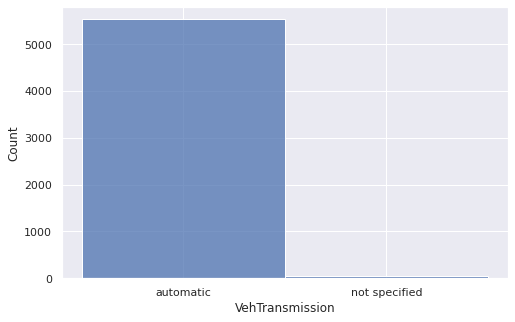

In [ ]:
plt.figure(figsize = (8,5))
sns.histplot(data=df, x="VehTransmission")

#### VehDriveTrain
https://www.vwofalamoheights.com/meaning-of-4x4-4wd-vs-awd-2wd-in-suvs-and-cars/


In [ ]:
df["VehDriveTrain"] = df["VehDriveTrain"].str.lower()

In [ ]:
# 4WD
df['VehDriveTrain'].mask(df['VehDriveTrain'] == '4x4/4wd', '4wd', inplace=True)
df['VehDriveTrain'].mask(df['VehDriveTrain'] == '4x4', '4wd', inplace=True)
df['VehDriveTrain'].mask(df['VehDriveTrain'] == 'four wheel drive', '4wd', inplace=True)
df['VehDriveTrain'].mask(df['VehDriveTrain'] == '4x4/4-wheel drive', '4wd', inplace=True)
# FWD
df['VehDriveTrain'].mask(df['VehDriveTrain'] == 'front wheel drive', 'fwd', inplace=True)
df['VehDriveTrain'].mask(df['VehDriveTrain'] == 'front-wheel drive', 'fwd', inplace=True)
df['VehDriveTrain'].mask(df['VehDriveTrain'] == '2wd', 'fwd', inplace=True)
# AWD
df['VehDriveTrain'].mask(df['VehDriveTrain'] == 'all wheel', 'awd', inplace=True)
df['VehDriveTrain'].mask(df['VehDriveTrain'] == 'all wheel drive', 'awd', inplace=True)
df['VehDriveTrain'].mask(df['VehDriveTrain'] == 'all-wheel drive', 'awd', inplace=True)
df['VehDriveTrain'].mask(df['VehDriveTrain'] == 'allwheeldrive', 'awd', inplace=True)
df['VehDriveTrain'].mask(df['VehDriveTrain'] == 'awd or 4x4', 'awd', inplace=True)
df['VehDriveTrain'].mask(df['VehDriveTrain'] == '4wd/awd', 'awd', inplace=True)
df['VehDriveTrain'].mask(df['VehDriveTrain'] == 'all-wheel drive with locking and limited-slip differential', 'awd', inplace=True)

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

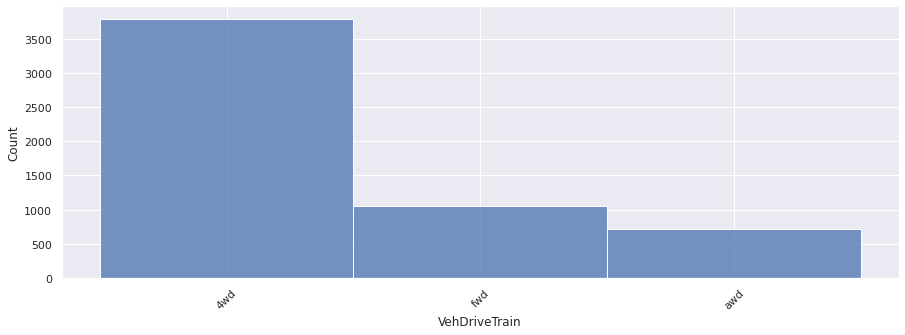

In [ ]:
plt.figure(figsize = (15,5))
sns.histplot(data=df, x="VehDriveTrain")
plt.xticks(rotation=45)

#### SellerListSrc, VehFuel, VehMake, VehModel, VehPriceLabel, VehCertified, VehTransmission,VehDriveTrain

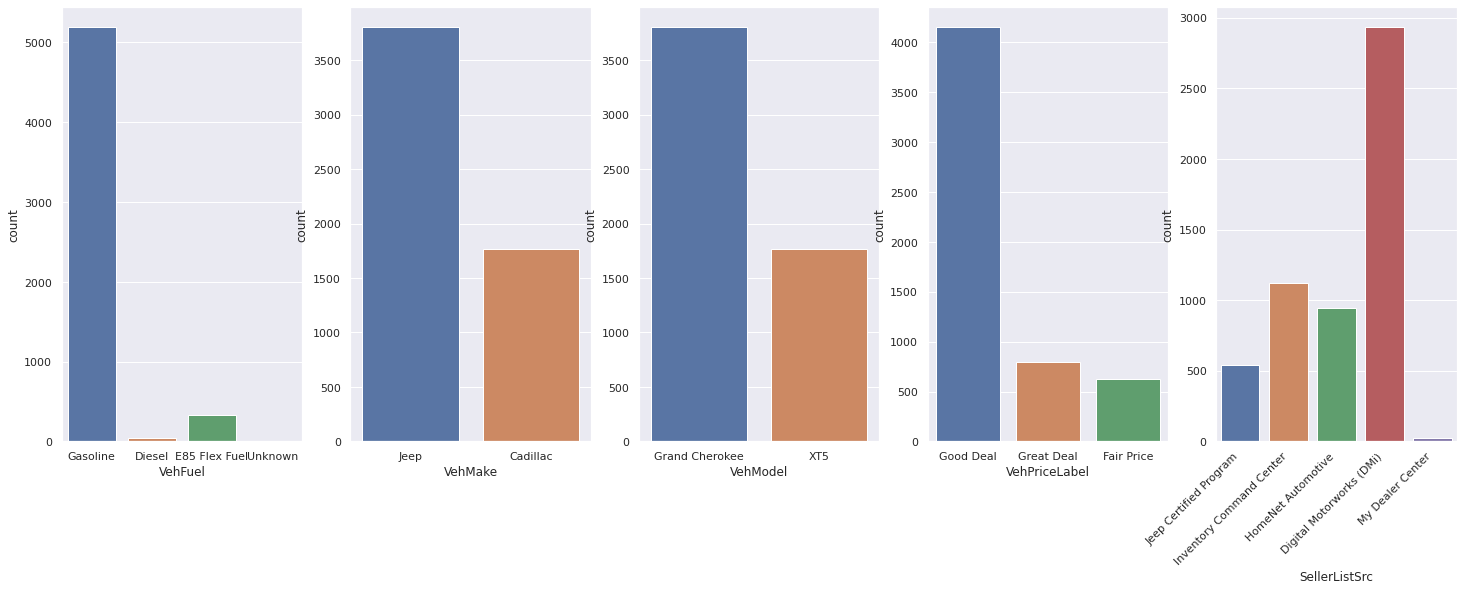

In [ ]:
sns.set(rc = {'figure.figsize':(25,8)})
fig, ax =plt.subplots(1,5)
sns.countplot(data=df, x='SellerListSrc', ax=ax[4])
sns.countplot(data=df, x='VehFuel',ax=ax[0])
sns.countplot(data=df, x='VehMake', ax=ax[1])
sns.countplot(data=df, x='VehModel',  ax=ax[2])
sns.countplot(data=df, x='VehPriceLabel', ax=ax[3])

plt.xticks(rotation=45, horizontalalignment='right')
fig.show()

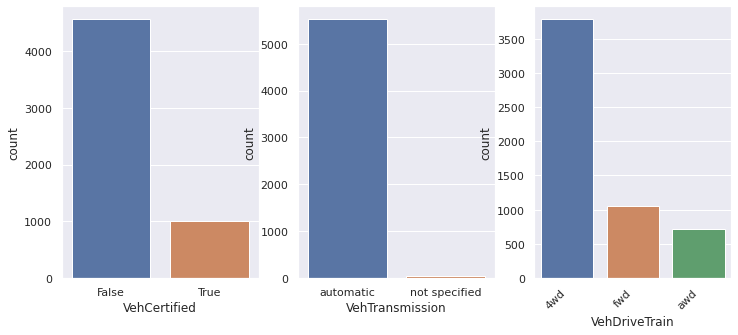

In [ ]:
sns.set(rc = {'figure.figsize':(12,5)})
fig, ax =plt.subplots(1,3)
sns.countplot(data=df, x='VehCertified', ax=ax[0])
sns.countplot(data=df, x='VehTransmission',ax=ax[1])
sns.countplot(data=df, x='VehDriveTrain',ax=ax[2])

plt.xticks(rotation=45, horizontalalignment='right')
fig.show()


drop single value cols 

In [ ]:
data.VehBodystyle.describe()

count     6298
unique       1
top        SUV
freq      6298
Name: VehBodystyle, dtype: object

In [ ]:
data.VehType.value_counts()

Used    6298
Name: VehType, dtype: int64

In [ ]:
# drop VehBodystyle since it only has one unique value : SUV
df = df.drop('VehBodystyle',axis=1)
df = df.drop('VehType',axis=1)

#### VehHistory

In [ ]:
df.VehHistory.value_counts() 

1 Owner, Buyback Protection Eligible                                                                               2649
1 Owner, Non-Personal Use Reported, Buyback Protection Eligible                                                    1785
1 Owner, Accident(s) Reported, Buyback Protection Eligible                                                          229
1 Owner, Accident(s) Reported, Non-Personal Use Reported, Buyback Protection Eligible                               168
2 Owners, Buyback Protection Eligible                                                                               166
0 Owners, Buyback Protection Eligible                                                                               129
0 Owners, Accident(s) Reported, Non-Personal Use Reported, Title Issue(s) Reported                                  128
2 Owners, Non-Personal Use Reported, Buyback Protection Eligible                                                    124
1 Owner, Title Issue(s) Reported        

In [ ]:
history = df["VehHistory"].str.split(",", n = 1, expand = True)

In [ ]:
df['Owners']=history[0].str.split(" ", n = 1, expand = True)[0].astype(int)
df['Accident'] =history[1].str.contains('Accident', regex=False)
df['Non_Personal'] = history[1].str.contains('Non-Personal', regex=False)
df['Buyback_Protection'] = history[1].str.contains('Buyback Protection', regex=False)
df['Title_Issue'] = history[1].str.contains('Title Issue(s)', regex=False)

In [ ]:
df['Accident'] = df.Accident.fillna(0)
df['Non_Personal'] = df.Non_Personal.fillna(0)
df['Buyback_Protection'] = df.Buyback_Protection.fillna(0)
df['Title_Issue'] = df.Title_Issue.fillna(0)

In [ ]:
df=df.drop('VehHistory', axis=1)

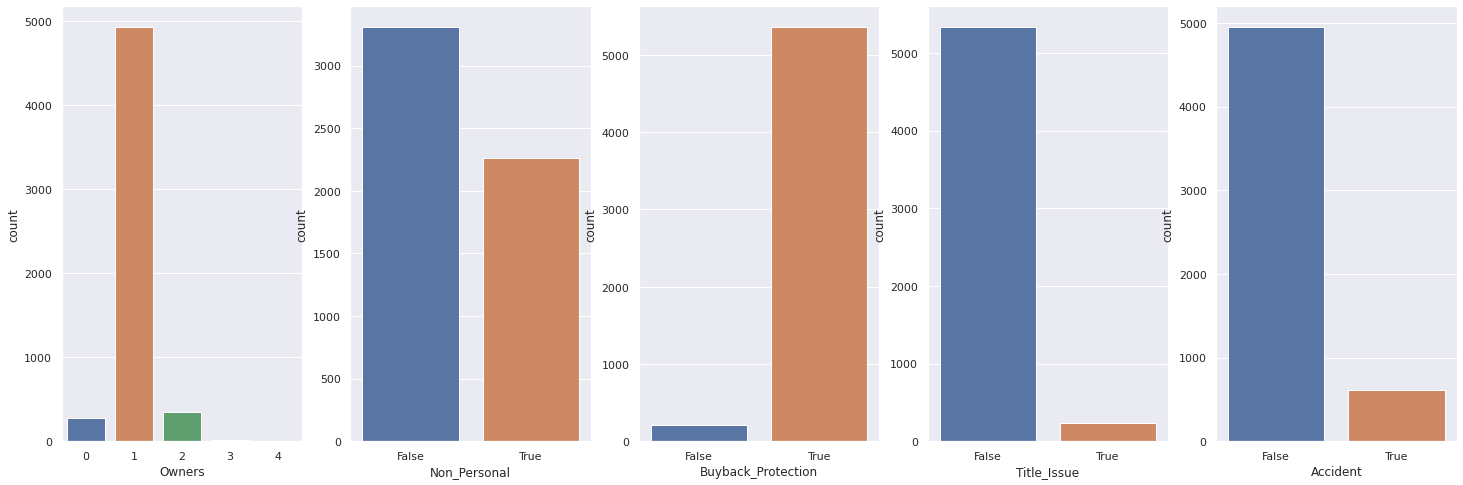

In [ ]:
sns.set(rc = {'figure.figsize':(25,8)})
fig, ax =plt.subplots(1,5)
sns.countplot(data=df, x='Owners', ax=ax[0])
sns.countplot(data=df, x='Non_Personal',ax=ax[1])
sns.countplot(data=df, x='Accident',ax=ax[4])
sns.countplot(data=df, x='Buyback_Protection',ax=ax[2])
sns.countplot(data=df, x='Title_Issue',ax=ax[3])

fig.show()

#### VehFeats

In [ ]:
df.VehFeats.describe()

count                                                  5567
unique                                                  765
top       ['1st and 2nd row curtain head airbags', '4-wh...
freq                                                    831
Name: VehFeats, dtype: object

In [ ]:
a = df["VehFeats"]

In [ ]:
a = a.apply(eval)

In [ ]:
df["VehFeats"]

2       ['18 WHEEL &amp; 8.4 RADIO GROUP-inc: Nav-Capa...
3       ['Android Auto', 'Antilock Brakes', 'Apple Car...
4       ['4-Wheel Disc Brakes', 'ABS', 'Adjustable Ste...
5       ['1st and 2nd row curtain head airbags', '4-wh...
6       ['1st and 2nd row curtain head airbags', '4-wh...
                              ...                        
6292    ['1st and 2nd row curtain head airbags', '4-wh...
6294    ['1st and 2nd row curtain head airbags', '4-wh...
6295    ['1st and 2nd row curtain head airbags', '4-wh...
6296    ['1st and 2nd row curtain head airbags', '4-wh...
6297    ['Airbag Occupancy Sensor', 'Curtain 1st And 2...
Name: VehFeats, Length: 5567, dtype: object

In [ ]:
c =[]
for i, l in enumerate(df["VehFeats"]):
  c.append(len(l))
df['fea_count'] = c

In [ ]:
# Getting Unique Values or Value Counts
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [ ]:
to_1D(a).value_counts()

Audio controls on steering wheel                                                                                     3333
1st and 2nd row curtain head airbags                                                                                 3327
ABS and Driveline Traction Control                                                                                   3327
4-wheel ABS Brakes                                                                                                   3327
Braking Assist                                                                                                       2121
                                                                                                                     ... 
3.45 rear axle ratio                                                                                                    1
Chrome Power w/Tilt Down Heated Side Mirrors w/Driver Auto Dimming$COMMA Manual Folding and Turn Signal Indicator       1
Dua                     

In [ ]:
f = to_1D(a).value_counts().nlargest(20)
f

Audio controls on steering wheel        3333
1st and 2nd row curtain head airbags    3327
ABS and Driveline Traction Control      3327
4-wheel ABS Brakes                      3327
Braking Assist                          2121
Auxilliary engine cooler                1785
Audio system memory card slot           1708
Anti-theft alarm system                 1632
Antilock Brakes                         1102
Auxiliary Input                          908
Bucket front seats                       854
Backup Camera                            827
Automatic front air conditioning         793
Bluetooth                                777
Audio Controls On Steering Wheel         756
AM/FM/Satellite-prep Radio               676
AM/FM Stereo                             655
Aluminum Wheels                          634
Alloy Wheels                             613
ABS                                      606
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

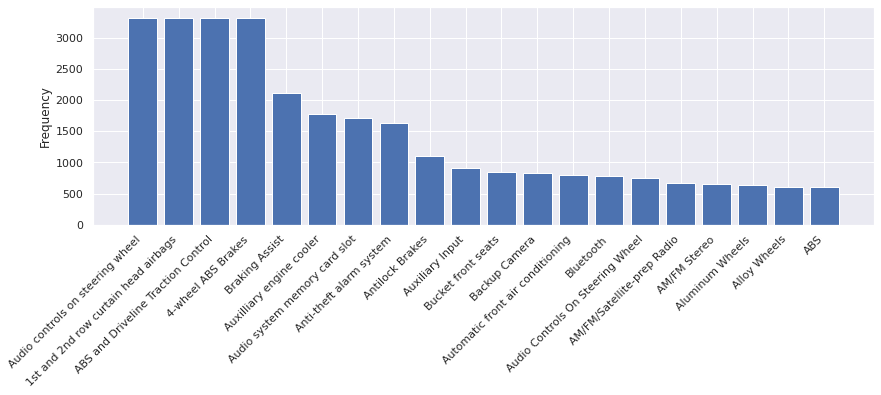

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(f.index,f.values)
ax.set_ylabel("Frequency", size = 12)
plt.xticks(rotation=45, horizontalalignment='right')

#### VehSellerNotes

In [ ]:
df.VehSellerNotes

2       Backed by a rigorous 125-point inspection by f...
3       Drop by to see us and you will quickly see how...
4       Luxury, Exterior Parking Camera Rear, Front Du...
5       Priced below KBB Fair Purchase Price! Clean CA...
6       2017 Jeep Grand Cherokee Laredo True Blue Pear...
                              ...                        
6292    CarMax makes car buying easy and hassle-free. ...
6294    CarMax makes car buying easy and hassle-free. ...
6295    Clean CARFAX. Certified. Black 2018 Cadillac X...
6296    Black 2017 Cadillac XT5 Luxury FWD 8-Speed Aut...
6297    With Vroom, you can buy your next car from the...
Name: VehSellerNotes, Length: 5567, dtype: object

### Encoding

utilized label encoding to compress the data into integer numbers

In [ ]:
df.VehEngine.describe()

count                      5567
unique                       88
top       3.6L V6 24V MPFI DOHC
freq                       1787
Name: VehEngine, dtype: object

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['SellerZip'] = le.fit_transform(df.SellerZip)
df['VehEngine'] = le.fit_transform(df.VehEngine)
df['VehColorInt'] = le.fit_transform(df.VehColorInt)
df['SellerState'] = le.fit_transform(df.SellerState)
df['VehColorExt'] = le.fit_transform(df.VehColorExt)
df['SellerListSrc'] = le.fit_transform(df.SellerListSrc)
df['VehDriveTrain'] = le.fit_transform(df.VehDriveTrain)
df['VehFuel'] = le.fit_transform(df.VehFuel)
df['VehMake'] = le.fit_transform(df.VehMake)
df['VehModel'] = le.fit_transform(df.VehModel)
df['VehPriceLabel'] = le.fit_transform(df.VehPriceLabel)
df['VehTransmission'] = le.fit_transform(df.VehTransmission)
df['VehYear'] = le.fit_transform(df.VehYear)

In [ ]:
df.replace({False: 0, True: 1}, inplace=True)

In [ ]:
df.tail(3)

,SellerCity,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehCertified,VehColorExt,VehColorInt,...,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price,Owners,Accident,Non_Personal,Buyback_Protection,Title_Issue,fea_count
6295,Dublin,0,Cadillac of Dublin,4.1,20.0,34,665,1,12,47,...,0,3,Luxury,35674.0,0,0,0,1,0,259
6296,Sandusky,0,Foster Chevrolet Cadillac,4.9,278.0,34,769,0,12,47,...,0,2,Luxury,31995.0,2,0,1,1,0,262
6297,Nashville,1,Vroom (Online Dealer - Nationwide Delivery),3.8,727.0,41,583,0,73,73,...,0,3,Trailhawk,36280.0,1,0,1,1,0,407


### Feature Selection

In [ ]:
df_clean = df.copy()
df_clean = df_clean.drop(['SellerCity','SellerName','VehFeats'], axis=1)

In [ ]:
all_featurs = df_clean.drop(['Vehicle_Trim','VehSellerNotes'], axis=1)

In [ ]:
X =all_featurs.drop('Dealer_Listing_Price', axis=1)
y =df_clean['Dealer_Listing_Price']

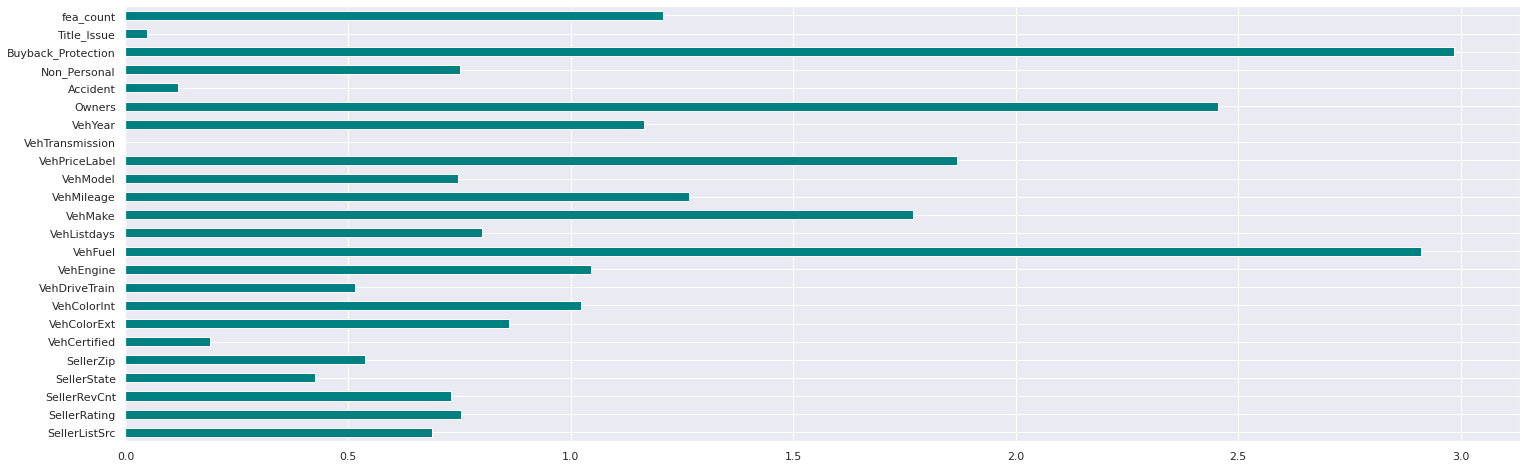

In [ ]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feat_importances.plot(kind='barh',color ='teal')
plt.show()

In [ ]:
feat_importances.sort_values(ascending=False)

Buyback_Protection    2.985208
VehFuel               2.910529
Owners                2.455319
VehPriceLabel         1.867743
VehMake               1.770127
VehMileage            1.265576
fea_count             1.208722
VehYear               1.164313
VehEngine             1.045504
VehColorInt           1.022718
VehColorExt           0.860792
VehListdays           0.800409
SellerRating          0.753727
Non_Personal          0.750926
VehModel              0.746804
SellerRevCnt          0.731129
SellerListSrc         0.689263
SellerZip             0.539175
VehDriveTrain         0.514717
SellerState           0.424897
VehCertified          0.190497
Accident              0.117364
Title_Issue           0.047638
VehTransmission       0.000000
dtype: float64

In [ ]:
X_selected = X.drop(['VehTransmission','Title_Issue'], axis=1)

In [ ]:
from sklearn.feature_selection import f_classif

importances = f_classif(X,y)
feat_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feat_importances.plot(kind='barh',color ='teal')
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                 1.214357e-306
SellerListSrc          4.771997e-06
SellerRating           5.789452e-01
SellerRevCnt           6.756409e-01
SellerState            3.886790e-03
SellerZip              1.283719e-02
VehCertified           4.560763e-03
VehColorExt            5.132720e-01
VehColorInt            2.503293e-04
VehDriveTrain          1.038599e-57
VehEngine              9.597280e-52
VehFuel                9.995740e-01
VehListdays            9.031093e-01
VehMake               7.848201e-157
VehMileage            2.243570e-155
VehModel               0.000000e+00
VehPriceLabel         1.256838e-240
VehTransmission        3.765889e-01
VehYear               3.025758e-161
Owners                 2.551617e-02
Accident               1.076880e-01
Non_Personal           2.241358e-16
Buyback_Protection     1.743540e-01
Title_Issue            2.364559e-01
fea_count              6.840858e-02
dtype: float64

In [ ]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['SellerListSrc', 'SellerState', 'SellerZip', 'VehCertified', 'VehColorInt', 'VehDriveTrain', 'VehEngine', 'VehMake', 'VehMileage', 'VehModel', 'VehPriceLabel', 'VehYear', 'Owners', 'Non_Personal']


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
len(selected_features_BE)

14

In [ ]:
selected_features_BE

['SellerListSrc',
 'SellerState',
 'SellerZip',
 'VehCertified',
 'VehColorInt',
 'VehDriveTrain',
 'VehEngine',
 'VehMake',
 'VehMileage',
 'VehModel',
 'VehPriceLabel',
 'VehYear',
 'Owners',
 'Non_Personal']

In [ ]:
#X=X[['SellerListSrc','SellerState','SellerZip''VehCertified','VehColorInt',
 #'VehDriveTrain','VehEngine','VehMake','VehMileage','VehModel',
 #'VehPriceLabel','VehYear','Owners',
#'Non_Personal']]
   

## Model

### LR

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

trans = MinMaxScaler()
X_scaled = trans.fit_transform(X_selected)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size =0.2,random_state=21)

In [ ]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('training data result')
predictions = lr.predict(X_train)

print('mean absolute error is: ',metrics.mean_absolute_error(y_train,predictions))
print('               mape is: ',np.mean(np.abs((y_train - predictions) / y_train))*100)
print(' mean squared error is: ',metrics.mean_squared_error(y_train,predictions))
print('           R2_score is: ',metrics.r2_score(y_train,predictions))
n=X_train.shape[0]
p=X_train.shape[1]
print('  Adjusted R2 score is: ',1-(1-metrics.r2_score(y_train,predictions))*((n-1)/(n-p-1)))


print('testing data result')
predictions = lr.predict(X_test)
print('mean absolute error is: ',metrics.mean_absolute_error(y_test,predictions))
print('               mape is: ',np.mean(np.abs((y_test - predictions) / y_test))*100)
print(' mean squared error is: ',metrics.mean_squared_error(y_test,predictions))
print('           R2_score is: ',metrics.r2_score(y_test,predictions))
n=X_test.shape[0]
p=X_test.shape[1]
print('  Adjusted R2 score is: ',1-(1-metrics.r2_score(y_test,predictions))*((n-1)/(n-p-1)))


training data result
mean absolute error is:  2939.4952535248012
               mape is:  8.943425783338235
 mean squared error is:  21213391.400097456
           R2_score is:  0.6071031004966853
  Adjusted R2 score is:  0.6051519195059238
testing data result
mean absolute error is:  3256.9056093461954
               mape is:  9.541091663792706
 mean squared error is:  28422438.50837012
           R2_score is:  0.6022769354349562
  Adjusted R2 score is:  0.5942568553062386


### RF

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test=train_test_split(X_selected,y,test_size=0.2,random_state=25)
scaler=MinMaxScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
print('training data result')
predictions = rf.predict(X_train_scaled)

print('mean absolute error is: ',metrics.mean_absolute_error(y_train,predictions))
print('               mape is: ',np.mean(np.abs((y_train - predictions) / y_train))*100)
print(' mean squared error is: ',metrics.mean_squared_error(y_train,predictions))
print('           R2_score is: ',metrics.r2_score(y_train,predictions))
n=X_test_scaled.shape[0]
p=X_test_scaled.shape[1]
print('  Adjusted R2 score is: ',1-(1-metrics.r2_score(y_train,predictions))*((n-1)/(n-p-1)))

training data result
mean absolute error is:  728.1388744666516
               mape is:  2.190138139111063
 mean squared error is:  1582882.4298066157
           R2_score is:  0.9721191770434333
  Adjusted R2 score is:  0.9715569606318435


In [ ]:
print('testing data result')
predictions = rf.predict(X_test_scaled)

print('mean absolute error is: ',metrics.mean_absolute_error(y_test,predictions))
print('               mape is: ',np.mean(np.abs((y_test - predictions) / y_test))*100)
print(' mean squared error is: ',metrics.mean_squared_error(y_test,predictions))
print('           R2_score is: ',metrics.r2_score(y_test,predictions))
n=X_test_scaled.shape[0]
p=X_test_scaled.shape[1]
print('  Adjusted R2 score is: ',1-(1-metrics.r2_score(y_test,predictions))*((n-1)/(n-p-1)))

testing data result
mean absolute error is:  1981.437540394973
               mape is:  5.963317354047091
 mean squared error is:  9594415.9809067
           R2_score is:  0.8411566581513084
  Adjusted R2 score is:  0.8379535843468434


### XGBoost

In [ ]:
import xgboost as xgb

X_train,X_test,y_train,y_test=train_test_split(X_selected,y,test_size=0.2,random_state=25)

data_dmatrix = xgb.DMatrix(data=X,label=y)

xg_reg = xgb.XGBRegressor(colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 6, alpha = 12, n_estimators = 200)
xg_reg.fit(X_train,y_train)

[10:40:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=12, colsample_bytree=0.8, max_depth=6, n_estimators=200)

In [ ]:
print('training data result')
predictions = xg_reg.predict(X_train)

print('mean absolute error is: ',metrics.mean_absolute_error(y_train,predictions))
print('               mape is: ',np.mean(np.abs((y_train - predictions) / y_train))*100)
print(' mean squared error is: ',metrics.mean_squared_error(y_train,predictions))
print('           R2_score is: ',metrics.r2_score(y_train,predictions))
n=X_test_scaled.shape[0]
p=X_test_scaled.shape[1]
print('  Adjusted R2 score is: ',1-(1-metrics.r2_score(y_train,predictions))*((n-1)/(n-p-1)))

training data result
mean absolute error is:  901.0389238996182
               mape is:  2.9118323585010533
 mean squared error is:  1433918.0343326575
           R2_score is:  0.9747430294906103
  Adjusted R2 score is:  0.9742337230275429


In [ ]:
print('testing data result')

predictions = xg_reg.predict(X_test)

print('mean absolute error is: ',metrics.mean_absolute_error(y_test,predictions))
print('               mape is: ',np.mean(np.abs((y_test - predictions) / y_test))*100)
print(' mean squared error is: ',metrics.mean_squared_error(y_test,predictions))
print('           R2_score is: ',metrics.r2_score(y_test,predictions))
n=X_test_scaled.shape[0]
p=X_test_scaled.shape[1]
print('  Adjusted R2 score is: ',1-(1-metrics.r2_score(y_test,predictions))*((n-1)/(n-p-1)))

testing data result
mean absolute error is:  1849.026851085615
               mape is:  5.682630810966288
 mean squared error is:  7008252.416104182
           R2_score is:  0.8839726944809877
  Adjusted R2 score is:  0.8816330054604393


## multi label Model

In [ ]:
all = df_clean.drop(['Dealer_Listing_Price','VehSellerNotes'], axis=1)
X = all.drop('Vehicle_Trim', axis=1)
Y= all.Vehicle_Trim

In [ ]:
Y.value_counts()

limited             1838
premium              761
laredo               721
luxury               667
overland             373
altitude             354
summit               222
base                 200
trailhawk            164
platinum             137
srt                   72
trackhawk             29
sterling edition      26
upland                 3
Name: Vehicle_Trim, dtype: int64

In [ ]:
y = pd.get_dummies(Y, columns=[0])
trim_names = y.columns
trim_names

Index(['altitude', 'base', 'laredo', 'limited', 'luxury', 'overland',
       'platinum', 'premium', 'srt', 'sterling edition', 'summit', 'trackhawk',
       'trailhawk', 'upland'],
      dtype='object')

In [ ]:
y.to_numpy()

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)#.toarray()

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

#### RF

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.ensemble import RandomForestClassifier

classifier = BinaryRelevance(classifier = RandomForestClassifier(),require_dense = [False, True])
classifier.fit(X_train, y_train)

BinaryRelevance(classifier=RandomForestClassifier(),
                require_dense=[False, True])

In [ ]:
predictions = classifier.predict(X_test)

br_f1=metrics.f1_score(y_test, predictions, average='micro')
br_hamm=metrics.hamming_loss(y_test,predictions)
print('Binary Relevance F1-score:',round(br_f1,3))
print('Binary Relevance Hamming Loss:',round(br_hamm,3))

Binary Relevance F1-score: 0.804
Binary Relevance Hamming Loss: 0.025


#### RF- Chain

In [ ]:
y = y.to_numpy()

In [ ]:
from skmultilearn.problem_transform import ClassifierChain

classifier = ClassifierChain(classifier = RandomForestClassifier(),require_dense = [False, True],order=[i for i in range(y.shape[1])])
classifier.fit(X_train,y_train)

ClassifierChain(classifier=RandomForestClassifier(),
                order=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
                require_dense=[False, True])

In [ ]:
predictions = classifier.predict(X_test)

br_f1=metrics.f1_score(y_test, predictions, average='micro')
br_hamm=metrics.hamming_loss(y_test,predictions)
print('Binary Relevance F1-score:',round(br_f1,3))
print('Binary Relevance Hamming Loss:',round(br_hamm,3))

Binary Relevance F1-score: 0.813
Binary Relevance Hamming Loss: 0.026


In [ ]:
temp = pd.DataFrame(predictions.todense(),columns= trim_names)
new_df = temp.idxmax(axis=1)

## Test data 

In [ ]:
t_data = pd.read_csv('Test_Dataset.csv')

### Pre-processing

In [ ]:
total = t_data.isnull().sum().sort_values(ascending=False)
percent = (t_data.isnull().sum()/t_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
VehColorInt,108,0.108
VehDriveTrain,64,0.064
VehEngine,58,0.058
VehSellerNotes,41,0.041
VehPriceLabel,38,0.038
VehFeats,37,0.037
VehTransmission,27,0.027
VehHistory,27,0.027
VehColorExt,7,0.007
VehMileage,1,0.001


In [ ]:
t_data['VehColorInt'] = t_data.VehColorInt.fillna('Other')
t_data['VehDriveTrain'] = t_data['VehDriveTrain'].fillna(method='ffill')
t_data['VehEngine'] = t_data['VehEngine'].fillna(method='ffill')
t_data['VehPriceLabel'] = t_data['VehPriceLabel'].fillna(method='ffill')
t_data['VehColorExt'] = t_data.VehColorExt.fillna('Other')
t_data['VehTransmission'] = t_data.VehTransmission.fillna('Not Specified')
t_data['VehMileage'] = t_data.VehMileage.fillna(t_data.VehMileage.mean())

In [ ]:
t_data =t_data.drop(['SellerIsPriv','VehBodystyle','VehType'], axis=1)

t_data["VehTransmission"] = t_data["VehTransmission"].str.lower()
t_data["VehTransmission"]=t_data["VehTransmission"].mask(t_data["VehTransmission"].str.contains('a.*t*.*', regex=True),'automatic')
t_data["VehTransmission"]=t_data["VehTransmission"].mask(t_data["VehTransmission"].str.contains('automatic')== False,'not specified')

t_data["VehDriveTrain"] = t_data["VehDriveTrain"].str.lower()
# 4WD
t_data['VehDriveTrain'].mask(t_data['VehDriveTrain'] == '4x4/4wd', '4wd', inplace=True)
t_data['VehDriveTrain'].mask(t_data['VehDriveTrain'] == '4x4', '4wd', inplace=True)
t_data['VehDriveTrain'].mask(t_data['VehDriveTrain'] == 'four wheel drive', '4wd', inplace=True)
t_data['VehDriveTrain'].mask(t_data['VehDriveTrain'] == '4x4/4-wheel drive', '4wd', inplace=True)
# FWD
t_data['VehDriveTrain'].mask(t_data['VehDriveTrain'] == 'front wheel drive', 'fwd', inplace=True)
t_data['VehDriveTrain'].mask(t_data['VehDriveTrain'] == 'front-wheel drive', 'fwd', inplace=True)
t_data['VehDriveTrain'].mask(t_data['VehDriveTrain'] == '2wd', 'fwd', inplace=True)
# AWD
t_data['VehDriveTrain'].mask(t_data['VehDriveTrain'] == 'all wheel', 'awd', inplace=True)
t_data['VehDriveTrain'].mask(t_data['VehDriveTrain'] == 'all wheel drive', 'awd', inplace=True)
t_data['VehDriveTrain'].mask(t_data['VehDriveTrain'] == 'all-wheel drive', 'awd', inplace=True)
t_data['VehDriveTrain'].mask(t_data['VehDriveTrain'] == 'allwheeldrive', 'awd', inplace=True)
t_data['VehDriveTrain'].mask(t_data['VehDriveTrain'] == 'awd or 4x4', 'awd', inplace=True)
t_data['VehDriveTrain'].mask(t_data['VehDriveTrain'] == '4wd/awd', 'awd', inplace=True)
t_data['VehDriveTrain'].mask(t_data['VehDriveTrain'] == 'all-wheel drive with locking and limited-slip differential', 'awd', inplace=True)


history = t_data["VehHistory"].str.split(",", n = 1, expand = True)

t_data['Owners']=history[0].str.split(" ", n = 1, expand = True)[0]
t_data['Owners'] = t_data.Owners.fillna(method='ffill').astype(int)
t_data['Accident'] =history[1].str.contains('Accident', regex=False)
t_data['Non_Personal'] = history[1].str.contains('Non-Personal', regex=False)
t_data['Buyback_Protection'] = history[1].str.contains('Buyback Protection', regex=False)
t_data['Title_Issue'] = history[1].str.contains('Title Issue(s)', regex=False)
t_data['Accident'] = t_data.Accident.fillna(0)
t_data['Non_Personal'] = t_data.Non_Personal.fillna(0)
t_data['Buyback_Protection'] = t_data.Buyback_Protection.fillna(0)
t_data['Title_Issue'] = t_data.Title_Issue.fillna(0)
t_data=t_data.drop('VehHistory', axis=1)

In [ ]:
t_data['VehFeats'] = t_data.VehFeats.fillna(0)

In [ ]:
c =[]
#t_data["VehFeats"]=t_data["VehFeats"].apply(eval)
for i, l in enumerate(t_data["VehFeats"]):
  if type(l) == int:
    c.append(0)
  else:
    c.append(len(l))
t_data['fea_count'] = c

In [ ]:
t_data['SellerZip'] = le.fit_transform(t_data.SellerZip)
t_data['VehEngine'] = le.fit_transform(t_data.VehEngine)
t_data['VehColorInt'] = le.fit_transform(t_data.VehColorInt)
t_data['SellerState'] = le.fit_transform(t_data.SellerState)
t_data['VehColorExt'] = le.fit_transform(t_data.VehColorExt)
t_data['SellerListSrc'] = le.fit_transform(t_data.SellerListSrc)
t_data['VehDriveTrain'] = le.fit_transform(t_data.VehDriveTrain)
t_data['VehFuel'] = le.fit_transform(t_data.VehFuel)
t_data['VehMake'] = le.fit_transform(t_data.VehMake)
t_data['VehModel'] = le.fit_transform(t_data.VehModel)
t_data['VehPriceLabel'] = le.fit_transform(t_data.VehPriceLabel)
t_data['VehTransmission'] = le.fit_transform(t_data.VehTransmission)
t_data['VehYear'] = le.fit_transform(t_data.VehYear)

t_data.replace({False: 0, True: 1}, inplace=True)

In [ ]:
t_data.tail(3)

,ListingID,SellerCity,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehCertified,VehColorExt,...,VehPriceLabel,VehSellerNotes,VehTransmission,VehYear,Owners,Accident,Non_Personal,Buyback_Protection,Title_Issue,fea_count
997,9994646,Tampa,2,Ferman Acura,5.0,134,8,212,0,64,...,1,*BRAND NEW* *2018* *CADILLAC* *XT5** LOADED WI...,0,3,1,1,1,1,0,150
998,9997199,Hamburg,3,Towne Chrysler Dodge Jeep RAM Inc,3.8,7,29,34,0,38,...,0,"Thousand?s of Vehicles, Positively Different E...",0,3,1,0,0,1,0,170
999,9999562,Rock Springs,1,Whisler Chevrolet,4.9,28,43,640,0,66,...,1,Features: 2018 Cadillac XT5 Luxury Red AWD 3.6...,0,3,1,0,1,1,0,259


### Prediction

In [ ]:
t_clean.shape

(1000, 24)

In [ ]:
t_clean = t_data.drop(['SellerCity','SellerName','VehFeats','ListingID','VehSellerNotes'], axis=1)

In [ ]:
p1 = xg_reg.predict(t_clean)
p2 = classifier.predict(t_clean)

In [ ]:
temp = pd.DataFrame(predictions.todense(),columns= trim_names)

In [ ]:
result = pd.DataFrame()
result['ListingID'] = t_data['ListingID']
result['Vehicle_Trim'] = temp.idxmax(axis=1)
result['Dealer_Listing_Pric'] = p1

In [ ]:
result.tail(2)

,ListingID,Vehicle_Trim,Dealer_Listing_Pric
998,9997199,limited,49200.710938
999,9999562,laredo,36762.578125


In [ ]:
result.to_csv('/content/result.csv')  